In [1]:
# ASTR 513: Problem Set #1
# N. Nicole Sanchez
# University of Washington, Seattle
#from astropy.cosmology import w0waCDM
#cosmo = w0waCDM(H0=70, Om0=0.3, Ode0=0.7)
import matplotlib.pyplot as plt
from astropy.constants import c, G, kpc, R_sun, pc
import pandas as pd
import numpy as np
from sympy import *
import seaborn as sns
from scipy import integrate
sns.set(style='ticks', palette='Set2')
sns.set_style({'font.family': [u'serif']},{'text.size': '.3'})
#plt.rc('font',size=14,family='serif',style='normal',
       #variant='normal',stretch='normal',weight='normal')
%matplotlib inline

$\large{\textit{Problem 1: Angular Diameter Distances}}$

In [2]:
# Code up the cosmology calculations
omega_m, omega_lam, h = 0.3, 0.7, 0.7   # 1 - omega_m = omega_lam, flat 
H_0 = h * 100 # MPC/h
z   = np.linspace(0.1,10, num=100)
c   = 3e5  #km/s

def angsize_per_kpc(lumin_dist,diameter,redshift):
    d_theta = (diameter*(1 + redshift)**2.)/lumin_dist
    return d_theta
    
def Hz(z): # Hubble function
    return 100*h*(omega_m*(1+z)**3+omega_lam)**.5

def Dconf(z): # conformal distance
    return c*integrate.romberg(dConfDistdz, 0, z)

def dConfDistdz(z):
    return 1./Hz(z)

def DA(z): # angular diameter distance
    return Dconf(z)/(1+z)

def Dhoriz(z):
    return integrate.quad(dConfDistdz, 1000, np.inf)

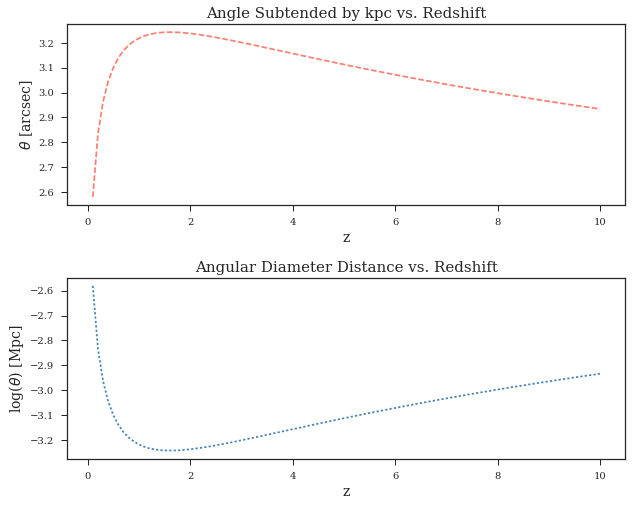

In [3]:
# Part A
# Galaxy-sized object with fixed-radius R = 1 kpc
# Plot angular size observed between z = 0.001 - 10 
ang_diam = [DA(z[i]) for i in range(100)]
len(ang_diam)
d_theta  = 1./np.array(ang_diam)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.subplots_adjust(hspace = 0.4)

ax1.plot(z,np.log10(ang_diam),color='Salmon',linestyle='--')
ax1.set_title('Angle Subtended by kpc vs. Redshift',size=15)
ax1.set_ylabel(r'$\theta$ [arcsec]',size=14)
ax1.set_xlabel('z',size=14)

ax2.plot(z,np.log10(d_theta),':',color='SteelBlue')
ax2.set_title('Angular Diameter Distance vs. Redshift',size=15)
ax2.set_ylabel(r'log($\theta$) [Mpc]',size=14)
ax2.set_xlabel('z',size=14)
plt.show()

$\textit{Where does is the angular sized minimized? What is the size?}$
    
    The angular size of the 1 kpc galaxy is minimized at z~1.6 and is 2.5".

In [4]:
# Part B
# Calculate comoving distance assuming velocity c
# "Comoving horizon"
cmov_horiz = Dhoriz(z)
#print(cmov_horiz[0]*c)

The comoving horizon is ~494.6 $\pm$ 0.003 Mpc.

In [5]:
# Part C
# What is the angle of subtended by the comoving horizon at z = 1000?
cmov_d = Dconf(1000)
ang_cmovhoriz = c*cmov_horiz[0] / cmov_d
#print(ang_cmovhoriz*60)

/Users/the_neekster/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.578674e-04
  AccuracyWarning)


The angle subtended by the comiving horizon at z = 1000 is 2.2 degrees.

$\large{\textit{Problem 2: The Expansion of the Universe}}$

$\textbf{Part A:}$

At late times when Dark Energy dominates, the Friedmann equation from: 

\begin{equation}
H^2 = H^2_0\ [\Omega_{m,0}(1 + z)^3 + \Omega_{r,0}(1 + z)^4 + \Omega_{\Lambda,0} + (1 − \Omega_{m,0} − \Omega_{r,0} − \Omega_{\Lambda,0})(1 + z)^2]
\end{equation}

becomes:

\begin{equation}
H^2 = H^2_0\ \Omega_{\Lambda,0}.
\end{equation}
 
Since we know,

\begin{equation}
H = \left(\frac{\dot{a}}{a}\right)
\end{equation}

we can determine that

\begin{align}
\left(\frac{\dot{a}}{a}\right)^2 &= H^2_0\ \Omega_{\Lambda,0} \\
&= \sqrt{H^2_0\ \Omega_{\Lambda,0}} \\
&= H_0\sqrt{\Omega_{\Lambda,0}} \\
\\
\dot{a} &= H_0\sqrt{\Omega_{\Lambda,0}}\ a  \\
\\
\frac{da}{dt} &= H_0\sqrt{\Omega_{\Lambda,0}}\ a \\
\\
\int \frac{da}{a} &= \int H_0\sqrt{\Omega_{\Lambda,0}}\ dt \\
\\
ln(a) &= H_0\sqrt{\Omega_{\Lambda,0}}\ t \\
\\
\therefore \ \ \  a &=\ e^{H_0\sqrt{\Omega_{\Lambda,0}}\ t}
\end{align}

and the scale factor a is expanding exponentially. 


$\textbf{Part B:}$


$\textit{Friedmann eq 1:}$   
\begin{equation}
\left(\frac{\dot{a}}{a}\right)^2 = \frac{8\pi G\rho}{3} - \frac{k}{a^{2}}
\end{equation}

where $k = 0$ in a flat universe.

$\textit{Friedmann eq 2:}$   
\begin{equation}
\left(\frac{\ddot{a}}{a}\right) = -\frac{4\pi}{3}(\rho + 3p)
\end{equation}

$\textit{Hubble constant}$
\begin{equation}
H(t) = \frac{\dot{a}}{a}
\end{equation}

For $H(t)$ to decrease monotonically:   

\begin{align}
\dot{H(t)} &= \frac{\dot{a}}{a} \\
&= \frac{\ddot{a}}{a} - \left(\frac{\dot{a}}{a}\right)^2 \\
&= -\frac{4\pi}{3}(\rho + 3p) - \frac{8\pi G\rho}{3}
\end{align}

where $(\rho + p)$ $\geq$ 0 must be true.
   




$\large{\textit{Problem 3: Densities & Sizes}}$

$\textbf{Part A:}$

In [6]:
# Calculate density density of Hydrogen and Helium at z=0
# Compare to present day sea-level density
from astropy import units
H_0    = 70 * units.km / units.s / units.Mpc #cm/s/Mpc
p_crit = 3*(H_0.cgs)**2 / (8*np.pi*G.cgs)
#print(p_crit) 

H_p  = p_crit * 0.75
He_p = p_crit * 0.25

m_H  = 1.673 * 10**(-24) * units.g
m_He = 6.647 * 10**(-24) * units.g
m_N  = m_He * 28

N_H  = H_p / m_H
N_He = He_p / m_He
#print(N_H, N_He)

p_air =  1.225 * units.kg / units.m**3
#print(H_p)
#print(p_air.cgs)
#print(N_H/(p_air.cgs/(2*m_N)))

p_m0 = p_crit*omega_m
#print(p_m0,omega_m,H_p)
z_Hatsea = (p_m0/H_p)**(1./3.) - 1 
#print(z_Hatsea)

Using the assumption that the current universe is at the critical density, we can calculate the critical density:

\begin{align}
\rho_c = \frac{3H^2}{8 \pi G}.
\end{align}

Using a H$_0$ = 70 km/s/Mpc, 

\begin{align}
\rho_c = 9.2 \times 10^{-30}\ g/cm^3
\end{align}

and knowing that 25% by mass is Helium, leaving 75% to be comprised of Hydrogen, we determine that the present number densities of Hydrogen and Helium are 4.13 $\times$ 10$^{-6}$ cm$^{-3}$ and 3.46 $\times$ 10$^{-7}$ cm$^{-3}$, respectively.

Compared to the current sea-level density of molecules in the Earth's atmosphere (assuming all Nitrogen for simplicity), 3.29 $\times$ 10$^{18}$ cm$^{-3}$, the number density of Hydrogen is 1.25 $\times$ 10$^{-22}$ % the earth's sea-level density of molecules.

To determine what redshift the number density of hydrogen would be equal to the number density of molecules in our atmosphere, we need to use

\begin{align}
\rho_{m @ z} = \rho_{m,0}\ (1+z)^3 \\
\end{align}

and solve for z,

\begin{align}
(1+z)^3 &= \frac{\rho_{sea\ level}}{\rho_{m,0}} \\
(1+z) &= \sqrt[3]{\frac{\rho_{sea\ level}}{\rho_{m,0}}} \\
z &= \sqrt[3]{\frac{\rho_{sea\ level}}{\rho_{m,0}}} - 1
\end{align}

given $\rho_{H @ z} = \rho_{sea\ level} = 1.23 \times 10^{-3}$ $g / cm^3$ and $\rho_{H,0} = 6.9 \times 10^{-30}$ $g / cm^3$. 

We find that the number density of Hydrogen will equal the density of sea-level molecules at z = 5.6 $\times$ 10$^8$.


$\textbf{Part B:}$

In [7]:
# Calculate comoving radius of spheres of different masses 
# For dwarf galaxy mass, MW galaxy mass, galaxy cluster mass
p_m0 = p_crit*omega_m

def comov_radius(rho_m0,mass):
    return (mass/(4/3*np.pi*rho_m0))**(1./3.)
    
# Dwarf mass galaxy
M_d   = 10**10. * units.Msun 
R_d_cmov = comov_radius(p_m0,M_d.cgs)
print('Dwarf Gxy R_comov',R_d_cmov/pc.cgs/10**6.)

# Milky Way mass galaxy
M_mw   = 10**12. * units.Msun 
R_mw_cmov = comov_radius(p_m0,M_mw.cgs)
print('MW Gxy R_comov',R_mw_cmov/pc.cgs/10**6.)

# Galaxy Cluster 
M_gc   = 10**15. * units.Msun 
R_gc_cmov = comov_radius(p_m0,M_gc.cgs)
print('Gxy Cluster R_comov',R_gc_cmov/pc.cgs/10**6.)

Dwarf Gxy R_comov 0.38826791886455997
MW Gxy R_comov 1.802180036651814
Gxy Cluster R_comov 18.021800366518132


The comoving radii of spheres that have halo masses of a dwarf galaxy (10$^{10}$ M$_{\odot}$), a Milky Way mass galaxy (10$^{12}$ M$_{\odot}$), and a galaxy cluster (10$^{15}$ M$_{\odot}$) are 0.39 Mpc, 1.8 Mpc, and 18 Mpc, respectively.

$\large{\textit{Problem 4: The Cosmic Volume}}$

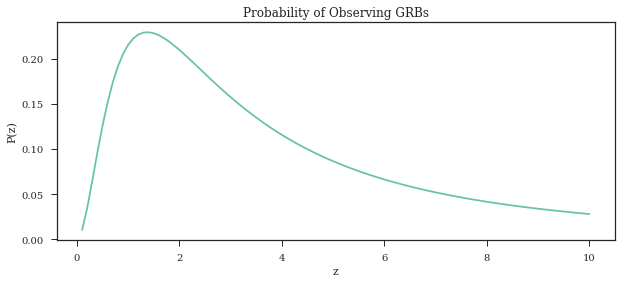

In [8]:
# Assume Einstein deSitter cosmology (flat with W_m = 1)
# Rate of gamma ray bursts = star formation rate
# comoving star formation rate density [M-sun yr^-1 Mpc^-3] = constant (no z dependence)
# Calculate the probability of observing a GRB at given redshift.
# NOTE: RATES WILL REDSHIFT

def comov_volume(z):
    dp_GRB_dz = (4.*np.pi*c*Dconf(z)**2)/Hz(z)
    stuff = dp_GRB_dz
    return stuff
    
p_sfr = 1. 

prob_GRB_dz = [(p_sfr*comov_volume(z[i])/(1+z[i])) for i in range(100)]
norm = sum(prob_GRB_dz)*(z[-1] - z[0])/100
#print(dp_GRB_dz)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)

ax1.plot(z,(prob_GRB_dz/norm))
ax1.set_title('Probability of Observing GRBs')
ax1.set_ylabel('P(z)')
ax1.set_xlabel('z')
plt.show()